In [ ]:
import matplotlib.pyplot as plt
import numpy as np
path =  "/content/drive/MyDrive/Colab Notebooks/midterm-assignment/"

#Problem 5 (10 pts + optional 5 pts)**
We consider a matrix optimization problem with the following objective:
```
argmin z∈Rm×n (sum|Ai,j − Zi,j|2 + λ||Z||∗)
```
where A ∈ Rm×n represents data matrix (user vs. movie rating data in recommendation systems), and also contains null value on Q denotes. ||·||∗ represents a nuclear norm of the matrix, λ > 0 denotes a hyper parameter for the regularization. In this optimization problem, Z corresponds to the recovered data from the incomplete data matrix A. In the scenario of the recommendation systems, the inferred Z at location Q corresponds to the inferred score of movie rating.
1. Describe the definition of the nuclear norm of a matrix by investigating it from www. In addition to its definition, define the proximal operation with the nuclear norm. (Hint: Use singular value decomposition.)
2. With some dataset (see Toy Dataset III), implement proximal gradient method for this machine learning problem and shows the recovered data Z by using surface plotting.
3. (Option: You can earn additional 5 pts) Implement non-negative matrix factorization as alternative approach to recover A and compare the performance by choosing the hyper parameters. Discuss the advantages and disadvantages of the two methods you implement here.

#問題5 (10pt+任意の5pt)
以下の目的を持つ行列最適化問題を考えます。
```
argmin z∈Rm×n (sum|Aij - Zij|2 + λ||Z|||∗)
```
ここで、A∈Rm×nは、データ行列（推薦システムにおけるユーザー対映画の評価データ）を表し、Qにはヌル値も含まれます。||-||∗は行列の核ノルム、λ>0は正則化のためのハイパーパラメータを表します。この最適化問題では、Zは不完全データ行列Aから復元されたデータに相当します。推薦システムのシナリオでは，位置Qで推定されたZは，映画の評価の推定スコアに相当します。
1. 行列の核ノルムの定義をwwwから調べて記述しなさい．
```
||A||trace = tr(A*A**0.5) = sum σi
```
その定義に加えて，核ノルムを用いた近似演算を定義しなさい．ヒント：特異値分解を使えばよい．
```
A = UΣV*
||A||trace = sum Σ
```

2. あるデータセット(Toy Dataset III参照)を用いて，この機械学習問題に近位勾配法を実装し，復元したデータZを曲面にプロットして示しなさい．

In [ ]:
#Dataset3
m,n = 20,40
r = 2
A = np.random.rand(m,r) @ np.random.rand(r,n)
ninc = 100
Q = np.random.permutation(m*n)[:ninc]
A[Q//n,Q%n] = np.nan

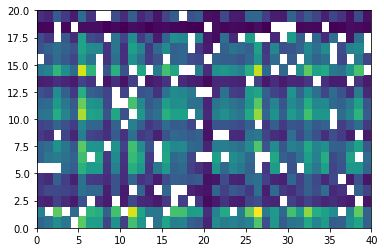

In [ ]:
plt.pcolor(A)
plt.savefig(path+"5-0.png")
plt.show()

In [ ]:
def f(Z):
    ret = 0
    for k in range(m*n):
        if k in Q:
            continue
        i = k//n
        j = k%n
        ret += (A[i,j]-Z[i,j])**2
    return ret

def g(Z):
    ret = l*np.linalg.eigvals(Z[:min(n,m),:min(n,m)]).sum()
    return ret

def df(Z):
    ret = np.empty((m,n))
    for k in range(m*n):
        i = k//n
        j = k%n
        if k in Q:
            ret[i,j] = 0
        else:
            ret[i,j] = -2*(A[i,j]-Z[i,j])
    return ret

In [ ]:
def soft_threashold(x, alpha):
    return np.sign(x) * np.maximum(np.abs(x) - alpha, 0.0)

def prox(Z, gamma):
    u,s,vh = np.linalg.svd(Z,full_matrices=False)
    return u@np.diag(soft_threashold(s,1))@vh

def proximal_gradient(df, prox, gamma, f, init_x):
    x = init_x
    result = f(x)
    loop = 0
    while 1:
        x_new = prox(x - gamma * df(x), gamma)
        result_new = f(x_new)
        print("\rloop:",loop,"e:",np.abs(result - result_new)/np.abs(result), end="")
        if np.abs(result - result_new)/np.abs(result) < 1e-9:
            print()
            break;
        x = x_new
        result = result_new
        loop += 1
    return x, result

In [ ]:
Z = np.ones((m,n))

u,s,vh = np.linalg.svd(Z,full_matrices=False)
h = 1/max(s)

Z, result = proximal_gradient(df, prox, h, f, Z)

loop: 292 e: 9.90677391444505e-10


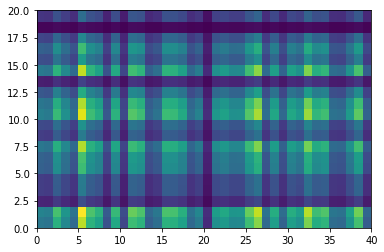

In [ ]:
plt.pcolor(Z)
plt.savefig(path+"5-1.png")
plt.show()

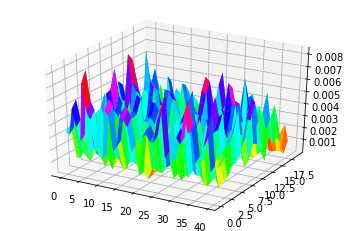

In [ ]:
x = np.arange(n)
y = np.arange(m)
x,y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, Z, rstride=1, cstride=1, cmap='hsv', linewidth=0.3)
